# Capstone Project: Grab Challenge(Traffic Management)

# 5. What you learned from exploring the data, including visualizations (Exploratory Data Analysis)

In [ ]:
import pandas as pd
from datetime import datetime,timedelta

import geohash as gh
from math import sin, cos, radians, atan2,sqrt
import statsmodels.api as sm
import numpy as np

#Visualization
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from mpl_toolkits.basemap import Basemap

import progressbar
from time import sleep

In [2]:
df = pd.read_csv('Processed_Grab.csv')

In [3]:
df.Timestamp = df.Timestamp.apply(lambda x: pd.Timestamp(x))

In [4]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [5]:
df.head()

,geohash6,demand,latitude,longitude,day_of_week,Timestamp
0,qp03wc,0.020072,-5.353088,90.653687,D,2019-01-18 20:00:00
1,qp03pn,0.024721,-5.413513,90.664673,C,2019-01-10 14:30:00
2,qp09sw,0.102821,-5.325623,90.906372,B,2019-01-09 06:15:00
3,qp0991,0.088755,-5.353088,90.752563,D,2019-02-01 05:00:00
4,qp090q,0.074468,-5.413513,90.719604,A,2019-01-15 04:00:00


In [6]:
df.dtypes

geohash6               object
demand                float64
latitude              float64
longitude             float64
day_of_week            object
Timestamp      datetime64[ns]
dtype: object

In [8]:
df.head()

,geohash6,demand,latitude,longitude,day_of_week,Timestamp
0,qp03wc,0.020072,-5.353088,90.653687,D,2019-01-18 20:00:00
1,qp03pn,0.024721,-5.413513,90.664673,C,2019-01-10 14:30:00
2,qp09sw,0.102821,-5.325623,90.906372,B,2019-01-09 06:15:00
3,qp0991,0.088755,-5.353088,90.752563,D,2019-02-01 05:00:00
4,qp090q,0.074468,-5.413513,90.719604,A,2019-01-15 04:00:00


C:\Users\Acer\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737057., 737060., 737067., 737074., 737081., 737088., 737091.,
        737098., 737105., 737112., 737119.]),
 <a list of 11 Text xticklabel objects>)

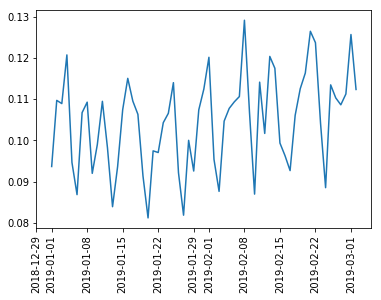

In [7]:
plt.plot(df.groupby(pd.DatetimeIndex(df['Timestamp']).normalize())['demand'].mean())
plt.xticks(rotation='vertical')

### 5.1. Graphing the points on the map

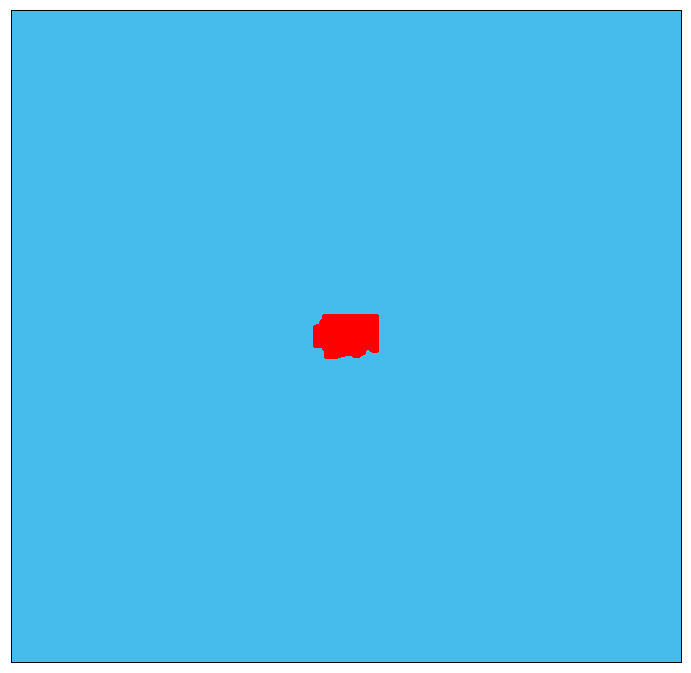

In [24]:
lat = df['latitude'].values
lon = df['longitude'].values

# determine range to print based on min, max lat and lon of the data#
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
plt.figure(figsize=(24,12))
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

## 5.2. Find hotspots

In [9]:
df_uniq = df.groupby('geohash6')['demand'].mean().sort_values(ascending=False)

df_uniq = df_uniq.reset_index()

df_uniq['lat_long'] = df_uniq.geohash6.apply(lambda x: gh.decode(x))

df_uniq['latitude'] = df_uniq.lat_long.apply(lambda x: x[0])

df_uniq['longitude'] = df_uniq.lat_long.apply(lambda x: x[1])

df_uniq.drop(columns='lat_long',inplace=True)

Text(0, 0.5, 'Longitude')

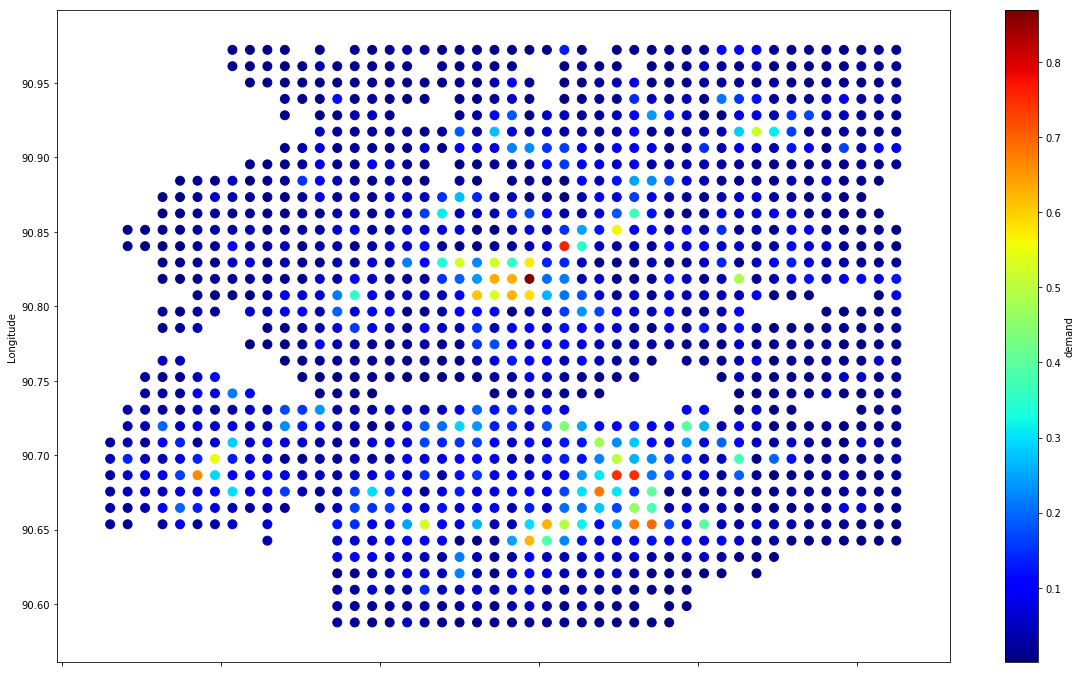

In [10]:
df_uniq.plot.scatter('latitude', 'longitude', c='demand', colormap='jet', s=80,figsize=(20,12))

plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [11]:
del df_uniq

## 5.3. Animate through time

In [12]:
df_ani = df.sort_values('Timestamp')

In [13]:
df_ani = pd.pivot_table(df_ani ,values = 'demand', columns= 'geohash6', index = 'Timestamp', fill_value= 0)

In [14]:
#df_ani = df_ani.groupby(pd.DatetimeIndex(df_ani.index).normalize()).agg('mean')
df_ani = df_ani.groupby(df_ani.index.hour).agg('mean')

In [15]:
df_ani = df_ani.T

In [16]:
df_ani.reset_index(inplace = True)

df_ani['lat_long'] = df_ani.geohash6.apply(lambda x: gh.decode(x))

df_ani['latitude'] = df_ani.lat_long.apply(lambda x: x[0])

df_ani['longitude'] = df_ani.lat_long.apply(lambda x: x[1])

In [17]:
df_ani.drop(columns = ['lat_long'],inplace = True)

In [18]:
df_ani.head()

Timestamp,geohash6,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,latitude,longitude
0,qp02yc,0.000768,0.001400,0.004001,0.004312,0.006902,0.006680,0.006829,0.003272,0.004406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000292,0.001037,-5.484924,90.653687
1,qp02yf,0.000070,0.000295,0.000287,0.000228,0.000126,0.000121,0.000000,0.000714,0.000581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000128,-5.479431,90.653687
2,qp02yu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-5.468445,90.653687
3,qp02yv,0.000000,0.000000,0.000000,0.000000,0.000000,0.001011,0.000096,0.000000,0.001255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-5.462952,90.653687
4,qp02yy,0.000911,0.000432,0.000235,0.000315,0.000931,0.000519,0.000441,0.000638,0.000619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000161,0.000128,-5.457458,90.653687


In [19]:
jet = cm.get_cmap('jet', 12)

dem_color = []
for i in range(1,25):
    dem_color.extend(jet(df_ani.iloc[:,i]))

In [ ]:
data.describe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
%matplotlib notebook

iters = 24

# Suppose 3 fixed sensors, each with a result every day for 5 days
days = sorted(list(range(iters))*1329)
channel = (list(range(1329)))*iters
long = list(df_ani['longitude'])*iters
lat = list(df_ani['latitude'])*iters
colours = ['green', 'yellow', 'orange', 'red', 'brown']
colour = random.choices(colours, k=31896)

# create dataframe
data = pd.DataFrame(list(zip(days, channel, long, lat, colour)), columns = ['day', 'sensor', 'x', 'y', 'colour'] )
print (data)## use this to better understand what is being plotted

# Set up the plot to be animated
# I'm using ax. here, but you could also just use plt.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-6, -5)
ax.set_xlabel('Longitude',fontsize=10)
ax.set_ylim(90, 91)
ax.set_ylabel('Latitude',fontsize=10)
ax.set_title('Daily changes in Travel Demand',fontsize=10)

for i, txt in enumerate(data.sensor):
    ax.annotate(txt, xy=(data.x[i], data.y[i]), textcoords='offset points', xytext=(10,10), fontsize=20, weight='bold')

# for convenience: define a function which prepares the data
def get_data(day=0,sensor_id=0):
    x = data.loc[(data.day ==day) & (data.sensor ==sensor_id), 'x']
    y = data.loc[(data.day ==day) & (data.sensor ==sensor_id), 'y'] 
    col = data.loc[(data.day ==day) & (data.sensor ==sensor_id), 'colour']  
    return x,y,col

# initialization function 
def init(): 
    # plot the first day (day=0) here:
    for j in range(1329):
        x,y,col=get_data(day=0,sensor_id=j)
        scat = ax.scatter(x,y,c=col, s=100)
    return scat

# animation function 
def animate(i): 
    for j in range(0,1329):        
        x,y,col=get_data(day=i,sensor_id=j)
        # print(i,col)## use this to understand "where" we are
        scat = ax.scatter(x,y,c=col, s=100)

    # return plot object 
    return scat

# call the animator     
# you are iterating over day=i, so you only have 5 frames here
# also you cant use blit=True here
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=24, interval=200)

plt.show()

<IPython.core.display.Javascript object>


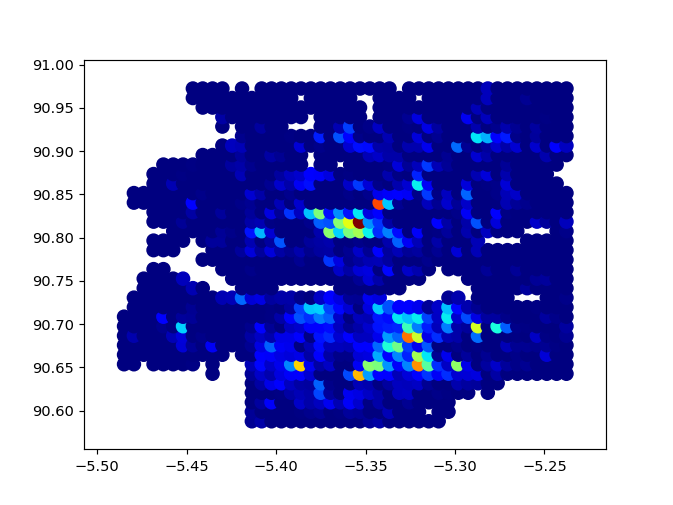

C:\Users\Acer\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


<IPython.core.display.Javascript object>


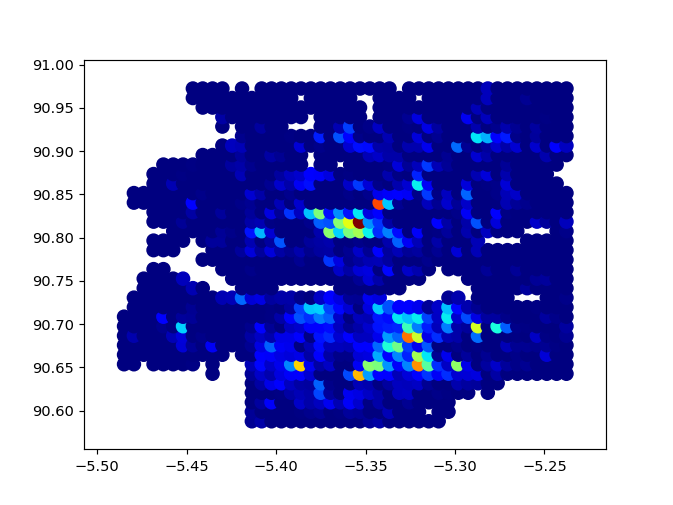

<IPython.core.display.Javascript object>


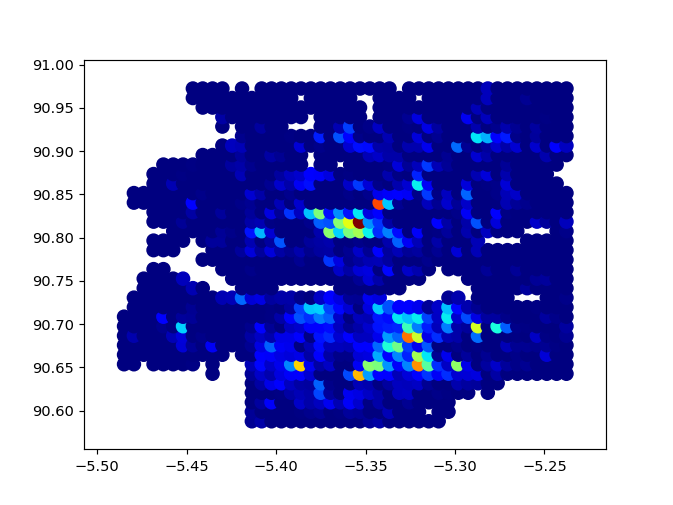

<IPython.core.display.Javascript object>


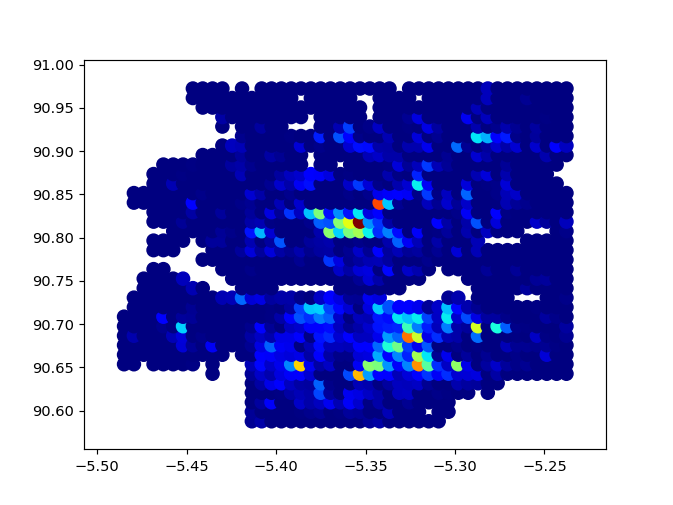

<IPython.core.display.Javascript object>


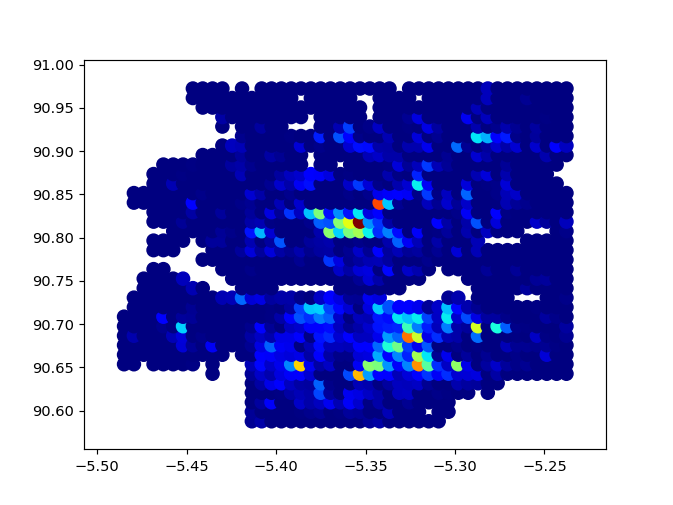

In [44]:
def GenerateColors(i):
    return df_gif.ix[:,0].to_list()

plt.ion()
for i in range(5):
    plt.figure()
    colors = GenerateColors(i)
    plt.scatter(df_gif['latitude'], df_gif['longitude'], c=colors, cmap='jet', s=80)
    plt.show(block=False)
    plt.pause(0.0001)

## 5.4. Additional EDA

### 5.4.1. Distribution of Demand

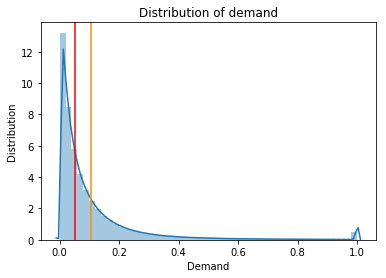

In [29]:
sns.distplot(df['demand'])
plt.title('Distribution of demand')
plt.ylabel('Distribution')
plt.xlabel('Demand')
plt.axvline(df.demand.mean(), color='darkorange')
plt.axvline(df.demand.median(), color='red')
plt.show()

### 5.4.2 Plot the average demand per day

Text(0.5, 0, 'Demand')

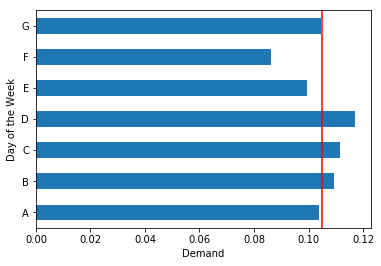

In [30]:
df.groupby('day_of_week')['demand'].mean().plot.barh()
plt.axvline(df.demand.mean(), color='red')
plt.ylabel('Day of the Week')
plt.xlabel('Demand')

## 5.5. Exploring Grab Demand Time Series Data

In [31]:
df.head()

,geohash6,demand,latitude,longitude,day_of_week,Timestamp
0,qp03wc,0.020072,-5.353088,90.653687,D,2019-01-18 20:00:00
1,qp03pn,0.024721,-5.413513,90.664673,C,2019-01-10 14:30:00
2,qp09sw,0.102821,-5.325623,90.906372,B,2019-01-09 06:15:00
3,qp0991,0.088755,-5.353088,90.752563,D,2019-02-01 05:00:00
4,qp090q,0.074468,-5.413513,90.719604,A,2019-01-15 04:00:00


In [32]:
df_stat = df.loc[df.geohash6 == 'qp09d9'].set_index('Timestamp')
df_stat.drop(columns = ['geohash6','latitude','longitude','day_of_week'],inplace=True)

In [33]:
df_stat.sort_index(inplace=True)

df_stat.head()

,demand
Timestamp,
2019-01-01 00:00:00,0.538371
2019-01-01 00:15:00,0.661457
2019-01-01 00:30:00,0.602286
2019-01-01 00:45:00,0.593089
2019-01-01 01:00:00,0.685252


### 5.5.1. Average demand for location qp09d9 for each hour of the day

Text(0.5, 0, 'Hour')

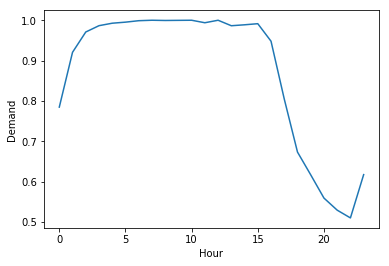

In [17]:
plt.plot(df_stat.groupby(df_stat.index.hour).mean())
plt.ylabel('Demand')
plt.xlabel('Hour')

### 5.5.2 Demand for each hour for each day at location qp09d9 

In [18]:
df_stat.reset_index(inplace=True)

In [19]:
df_stat.head()

,Timestamp,demand
0,2019-01-01 00:00:00,0.538371
1,2019-01-01 00:15:00,0.661457
2,2019-01-01 00:30:00,0.602286
3,2019-01-01 00:45:00,0.593089
4,2019-01-01 01:00:00,0.685252


Text(0.5, 0, 'Date')

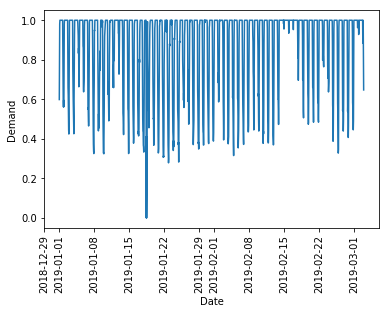

In [20]:
plt.plot(df_stat.groupby(pd.Grouper(key='Timestamp',freq='H')).mean().fillna(0))
plt.xticks(rotation='vertical')
plt.ylabel('Demand')
plt.xlabel('Date')

### 5.5.3. Average demand per hour for all locations

Text(0, 0.5, 'Demand')

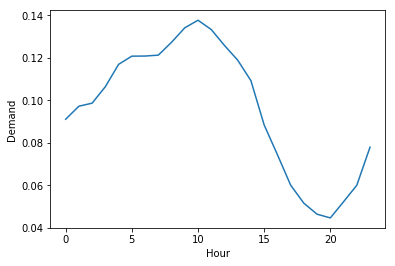

In [22]:
plt.plot(df.drop(columns=['geohash6','latitude','longitude','day_of_week']).groupby(df['Timestamp'].dt.hour).mean().fillna(0))
plt.xlabel('Hour')
plt.ylabel('Demand')

### 5.5.4 Mean demand for all locations each hour for 2 months

Text(0, 0.5, 'Demand')

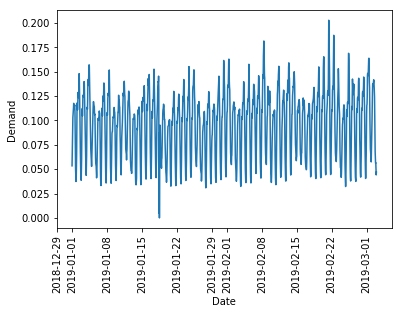

In [28]:
plt.plot(df.drop(columns=['geohash6','latitude','longitude','day_of_week']).groupby(pd.Grouper(key='Timestamp', freq='H')).mean().fillna(0))
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Demand')

## 5.6. Check for Stationarity for Univariate Data

Since we will be using time series analysis, we need to check for stationarity to determine what model is appropriate for the data set. 

Although multivariate time series analysis will be used, I just wanted to the behavior of demand across the two months of data.

### 5.6.1 Visual Test

From the graph below, we see that the mean, variance, and covariance are not constant throughout time

In [31]:
df.groupby('geohash6')['demand'].mean().sort_values(ascending = False).head()

geohash6
qp09d9    0.869152
qp09e5    0.761055
qp03xx    0.753067
qp03xw    0.747082
qp03yb    0.695687
Name: demand, dtype: float64

In [32]:
df_stat = df.loc[df.geohash6 == 'qp09d9'].set_index('Timestamp')
df_stat.drop(columns = ['geohash6','latitude','longitude','day_of_week'],inplace=True)

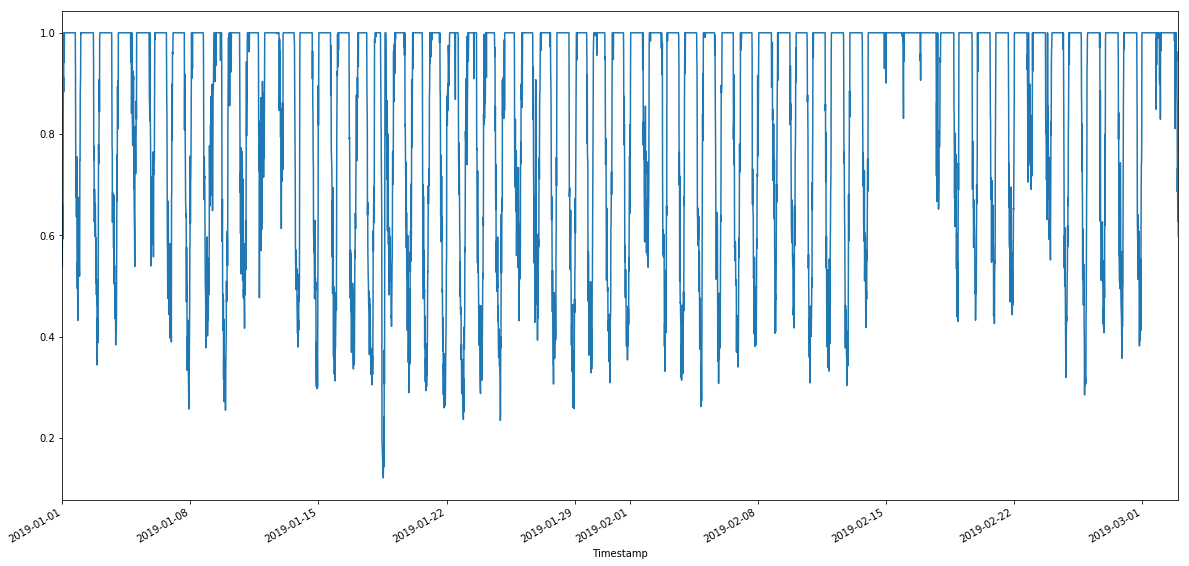

In [33]:
df_stat['demand'].plot(figsize=(20,10))

### 5.6.3. METHODS OF MAKING (UNIVARIATE) DATA STATIONARY

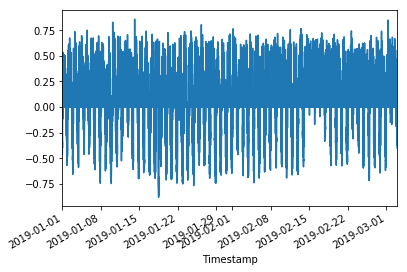

In [34]:
#Differencing
df_stat['demand_diff'] = df_stat['demand'] - df_stat['demand'].shift(1)
df_stat['demand_diff'].dropna().plot()

In [35]:
#Seasonal Differencing
n=7
df_stat['demand_diff'] = df_stat['demand'] - df_stat['demand'].shift(n)

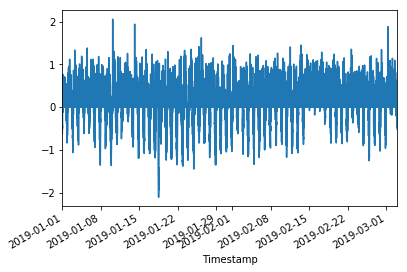

In [36]:
# Transformation
df_stat['demand_log'] = np.log(df_stat['demand'])
df_stat['demand_log_diff'] = df_stat['demand_log'] - df_stat['demand_log'].shift(1)
df_stat['demand_log_diff'].dropna().plot()

# 6. How you chose which features to use in your analysis

In [37]:
df.head()

,geohash6,demand,latitude,longitude,day_of_week,Timestamp
0,qp03wc,0.020072,-5.353088,90.653687,D,2019-01-18 20:00:00
1,qp03pn,0.024721,-5.413513,90.664673,C,2019-01-10 14:30:00
2,qp09sw,0.102821,-5.325623,90.906372,B,2019-01-09 06:15:00
3,qp0991,0.088755,-5.353088,90.752563,D,2019-02-01 05:00:00
4,qp090q,0.074468,-5.413513,90.719604,A,2019-01-15 04:00:00
